# N-Grams

It's a probabilistic model that's trained on a corpus of text. Such a model is useful in many NLP applications including speech recognition, machine translation and predictive text input. An N-gram model is built by counting how often word sequences occur in corpus text and then estimating the probabilities.

## Types of N-Grams

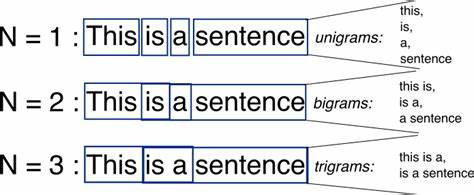

## Use-cases of N-Grams

- Auto completion of sentences
- Auto spell check
- Voice-based personal assistant bots

## Unigram

**Unigram** an n-gram consisting of a single item from a sequence.

- It is commonly used to calculate the probability of finding a word in an article.

$ count of (A) \div corpus length $

In [37]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

string = "moses supposes his toeses are roses but moses supposes erroneously"

unigrams = ngrams(word_tokenize(string), 1)

for item in unigrams:
    print(item)

('moses',)
('supposes',)
('his',)
('toeses',)
('are',)
('roses',)
('but',)
('moses',)
('supposes',)
('erroneously',)


### Calculating probabilities in unigram models

In [38]:
### Calculate counts of each word

unique_string = set(word_tokenize(string))

words_frq = []
for uniques in unique_string:
    frq = string.count(uniques)
    words_frq.append((uniques, frq))

words_frq

[('but', 1),
 ('erroneously', 1),
 ('roses', 1),
 ('toeses', 1),
 ('moses', 2),
 ('supposes', 2),
 ('his', 1),
 ('are', 1)]

In [39]:
### Calculate probabilities:

probab = []
tokens = word_tokenize(string)

for count in range(len(words_frq)):
    pro = words_frq[count][1]/len(tokens)
    probab.append(pro)

print('the probabilities are: ',probab)

the probabilities are:  [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1]


In [40]:
probabilities = []
for i,j in zip(unique_string, probab):
    probabilities.append((i,j))
probabilities

[('but', 0.1),
 ('erroneously', 0.1),
 ('roses', 0.1),
 ('toeses', 0.1),
 ('moses', 0.2),
 ('supposes', 0.2),
 ('his', 0.1),
 ('are', 0.1)]

## Bigram

**Bigram** an n-gram consisting of two items from a sequence
- Two words that are used together to mean something specific

$ countof(A \ then \ B) \div countof(A) $

### Method 1

In [ ]:
import nltk as nl
from nltk.tokenize import word_tokenize

string = "moses supposes his toeses are roses but moses supposes erroneously"

bigrams = nl.bigrams(word_tokenize(string))
for i in bigrams:
    print(i)


('moses', 'supposes')
('supposes', 'his')
('his', 'toeses')
('toeses', 'are')
('are', 'roses')
('roses', 'but')
('but', 'moses')
('moses', 'supposes')
('supposes', 'erroneously')


### Method 2

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

string = "moses supposes his toeses are roses but moses supposes erroneously"

bigrams = ngrams(word_tokenize(string),2)

for i in bigrams:
    print(i)

('moses', 'supposes')
('supposes', 'his')
('his', 'toeses')
('toeses', 'are')
('are', 'roses')
('roses', 'but')
('but', 'moses')
('moses', 'supposes')
('supposes', 'erroneously')


# Trigram

**Trigram** an n-gram consisting of three items of a sequence
- Three words that are used together to mean something specific

### Method 1

In [ ]:
import nltk as nl
from nltk.tokenize import word_tokenize

string = "moses supposes his toeses are roses but moses supposes erroneously"

trigrams = nl.trigrams(word_tokenize(string))

for i in trigrams:
    print(i)


('moses', 'supposes', 'his')
('supposes', 'his', 'toeses')
('his', 'toeses', 'are')
('toeses', 'are', 'roses')
('are', 'roses', 'but')
('roses', 'but', 'moses')
('but', 'moses', 'supposes')
('moses', 'supposes', 'erroneously')


### Method 2

In [ ]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

string = "moses supposes his toeses are roses but moses supposes erroneously"

trigrams = ngrams(word_tokenize(string),3)

for i in trigrams:
    print(i)


('moses', 'supposes', 'his')
('supposes', 'his', 'toeses')
('his', 'toeses', 'are')
('toeses', 'are', 'roses')
('are', 'roses', 'but')
('roses', 'but', 'moses')
('but', 'moses', 'supposes')
('moses', 'supposes', 'erroneously')


## What is padding in NLP?

padding is a technique used to ensure that all input sequences have the same length. This is necessary because neural networks require inputs that have the same shape and size. However, when we pre-process and use texts as inputs for our model, not all sentences have the same length. In other words, some sentences are longer or shorter than others. We need to have inputs with the same size, and this is where padding comes in 1.

Padding is a special form of masking where the masked steps are at the start or the end of a sequence. Padding comes from the need to encode sequence data into contiguous batches: in order to make all sequences in a batch fit a given standard length.
The padding is added before splitting the sentence.

n-1 padding is added.



In [28]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize


string = "moses supposes his toeses are roses but moses supposes erroneously"

list(ngrams(word_tokenize(string), pad_left=True, left_pad_symbol="<s>",
                                pad_right=True, right_pad_symbol="</s>", n=2))

[('<s>', 'moses'),
 ('moses', 'supposes'),
 ('supposes', 'his'),
 ('his', 'toeses'),
 ('toeses', 'are'),
 ('are', 'roses'),
 ('roses', 'but'),
 ('but', 'moses'),
 ('moses', 'supposes'),
 ('supposes', 'erroneously'),
 ('erroneously', '</s>')]

Alternatively, We can get rid of the parameters by using
> pad_both_ends method in NLTK

**Note the n argument, that tells the function we need padding for bigrams.**

In [36]:
from nltk.lm.preprocessing import pad_both_ends
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

string = "moses supposes his toeses are roses but moses supposes erroneously"

list(ngrams(pad_both_ends(word_tokenize(string), n=2), n=2))


[('<s>', 'moses'),
 ('moses', 'supposes'),
 ('supposes', 'his'),
 ('his', 'toeses'),
 ('toeses', 'are'),
 ('are', 'roses'),
 ('roses', 'but'),
 ('but', 'moses'),
 ('moses', 'supposes'),
 ('supposes', 'erroneously'),
 ('erroneously', '</s>')]

### Training the Maximum Likelihood Model

Maximum likelihood estimation estimates the model parameters such that the probability is maximized.

- Get the requisite n_grams frequency counts from a corpus.

- Normalize them to a 0-1 range.

- Build the vocabulary: to create this vocabulary we need to pad our sentences (just like for counting ngrams) and then combine the sentences into one flat stream of words.


To do the above steps, we need to create and Ngram and add the padding then flatten the list. All these steps are requested for pre-processing to train the MLE model. However, we can use padded_everygram_pipeline() in NLTK to do all the steps in one call.


**References:**

https://www.nltk.org/api/nltk.lm.html

https://www.kaggle.com/code/alvations/n-gram-language-model-with-nltk

In [2]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.lm import smoothing

string = "moses supposes his toeses are roses but moses supposes erroneously"

#Create Bigram Language Model
train, vocab = padded_everygram_pipeline(2, [word_tokenize(string)])

C:\Users\Nawaf\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from nltk.lm import MLE
lm = MLE(2)
lm.fit(train, vocab) #Train the Maximum Likelihood Model
print(lm.vocab)
print(len(lm.vocab))

<Vocabulary with cutoff=1 unk_label='<UNK>' and 11 items>
11


In [4]:
lm.vocab.lookup(['moses','supposes'])

('moses', 'supposes')

In [8]:
lm.vocab.lookup(['moses'])

('moses',)

### counts for unigrams and bigrams

In [9]:
print(lm.counts['moses'])
# a then b
print(lm.counts[['moses']]['supposes'])

2
2


In [ ]:
print(lm.score('moses')) #Calculate Bigram Probabilities

0.16666666666666666


Here’s how you get the score for a word given some preceding context. For example we want to know what is the chance that “b” is preceded by “a”.

In [ ]:
# b then a
lm.score("supposes", ["moses"])

1.0

### Evaluating n_grams models using preplexity

**Preplexity** is the probability of the test set normalized by the number of words

In [ ]:
test = [('moses', 'supposes'), ('toeses','are')]
print(lm.perplexity(test))

1.0


## Task: Generating tweets using n_grams

In this Task, we will build a MLE model with n-gram to generate tweets.

The agenda is:
1. load the data:
https://www.kaggle.com/datasets/adizafar/large-random-tweets-from-pakistan

2. pre-processing the data:
*   Remove hashtags
*   Remove RT
*   Remove any website
*   Remove any mentions




3. build MLE model with n-gram
4. evaluate the model

before we start we need to install library to handle the emojis in tweets
> pip install emoji